In [30]:
from oop_functions.merge_dataset_functions import merge_data_over_years
from oop_functions.missing_values_functions import print_records_vs_unique
from oop_functions.util_functions import get_cols_missing_percentage, print_df, convert_numeric_to_float16
from processing_functions import *
%matplotlib inline
import warnings

warnings.filterwarnings("ignore")


In [31]:
# reading datasets
personal_data = pd.read_csv('./dataset/Ovarian/ovar_data_mar22_d032222.csv')
screen_data = pd.read_csv('./dataset/Ovarian/Screening/ovar_screen_data_mar22_d032222.csv')
screen_abnorm_data = pd.read_csv('./dataset/Ovarian/Screening Abnormalities/ovar_scrsub_data_mar22_d032222.csv')
processed_data = pd.read_csv('./processed_dataset/recent_propagated_dataset.csv', index_col=0)

In [32]:
def get_column_values_count(df, get_counts_col):
    df = pd.DataFrame(df[get_counts_col].value_counts().sort_index())
    df = df.reset_index()
    df.columns = [get_counts_col, 'count']
    return df


In [33]:

processed_data['ca125ii_level_binary'] = np.nan
processed_data.loc[processed_data['ca125ii_level'] < 35, 'ca125ii_level_binary'] = 1
processed_data.loc[processed_data['ca125ii_level'] >= 35 , 'ca125ii_level_binary'] = 2

array([[<AxesSubplot:title={'center':'ca125ii_level'}>]], dtype=object)

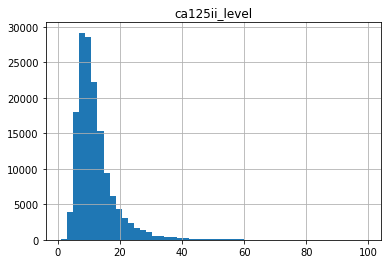

In [34]:
processed_data[processed_data['ca125ii_level'] < 100][['ca125ii_level']].hist(bins=50)

In [35]:
get_column_values_count(processed_data, 'ca125ii_level')

,ca125ii_level,count
0,1.0,6
1,2.0,101
2,3.0,756
3,4.0,3111
4,5.0,6915
...,...,...
213,1859.0,1
214,2182.0,1
215,3010.0,1
216,4756.0,1


In [36]:
get_column_values_count(processed_data, 'ca125ii_level_binary')

,ca125ii_level_binary,count
0,1.0,148020
1,2.0,2558


In [37]:
get_column_values_count(processed_data, 'ca125_result')

,ca125_result,count
0,1.0,148142
1,2.0,2437
2,4.0,314
3,8.0,91
4,9.0,5


In [53]:
processed_data = processed_data[~processed_data['ca125_result'].isna() | ~processed_data['ca125ii_level_binary'].isna()]
processed_data = processed_data[~((processed_data['ca125_result'].isin([4, 8, 9])) & processed_data['ca125ii_level_binary'].isna())]

In [56]:
filtered_df = processed_data[processed_data['ca125_result'] != processed_data['ca125ii_level_binary']][['ca125ii_level', 'ca125ii_level_binary', 'ca125_result']]

In [57]:
filtered_df

,ca125ii_level,ca125ii_level_binary,ca125_result
2236,45.0,2.0,1.0
2337,41.0,2.0,1.0
2491,39.0,2.0,1.0
2815,47.0,2.0,1.0
2904,36.0,2.0,1.0
...,...,...,...
110356,40.0,2.0,1.0
113148,38.0,2.0,1.0
113345,40.0,2.0,1.0
114041,42.0,2.0,1.0


In [58]:
print_df(filtered_df)

+--------+-----------------+------------------------+----------------+
|        |   ca125ii_level |   ca125ii_level_binary |   ca125_result |
|--------+-----------------+------------------------+----------------|
|   2236 |              45 |                      2 |              1 |
|   2337 |              41 |                      2 |              1 |
|   2491 |              39 |                      2 |              1 |
|   2815 |              47 |                      2 |              1 |
|   2904 |              36 |                      2 |              1 |
|   4201 |              35 |                      2 |              1 |
|   4723 |              36 |                      2 |              1 |
|   6205 |              39 |                      2 |              1 |
|   6694 |              41 |                      2 |              1 |
|   6762 |              44 |                      2 |              1 |
|   7556 |               6 |                      1 |              2 |
|   93